In [2]:
from citros_data_analysis import data_access as da

# Double Pendulum

Let's create CitrosDB obkect to query and plot the results of the simulation. Let's specify that we would like to see batches that were created with double pendulum simulation scenario:

In [3]:
citros = da.CitrosDB(simulation = 'simulation_double_pendulum')

In [30]:
citros.search_batch()

{'cloud_test_double_pendulum_2': {'id': '8126c92c-e6c2-4c92-a76c-b2f8145482b9',
  'sid': [0],
  'created_at': '2023-11-26T08:32:42.302527+00:00',
  'updated_at': '2023-11-26T12:54:58.590765+00:00',
  'status': 'DONE',
  'data_status': 'LOADED',
  'data_last_access': '2023-11-26T12:54:58.590765+00:00',
  'tag': 'afbb2ce8450c715fff4d694bfe2967541c7031e8',
  'simulation': 'simulation_double_pendulum',
  'message': 'new_data_structure',
  'parallelism': 1,
  'completions': 1,
  'cpu': 2,
  'gpu': 0,
  'memory': '265',
  'repo': 'pendulum',
  'link': 'https://citros.io/pendulum/data/runs/simulation_double_pendulum/cloud_test_double_pendulum_2'},
 'cloud_test_double_pendulum_1': {'id': 'e252060f-200a-4d63-afef-6e64827b5082',
  'sid': [0],
  'created_at': '2023-11-22T13:45:49.336571+00:00',
  'updated_at': '2023-11-26T08:51:08.235473+00:00',
  'status': 'DONE',
  'data_status': 'LOADED',
  'data_last_access': '2023-11-26T08:50:51.611906+00:00',
  'tag': 'f5cb8e822b32677232cbc398febb27108b074d

Let's print the names of the batches containing simulations with the status 'DONE'. This indicates that the simulations have successfully finished:

In [31]:
list(citros.search_batch(sid_status='DONE').keys())

['cloud_test_double_pendulum_2', 'cloud_test_double_pendulum_1']

Print general information about the most recent simulation. In this simulation we have two topics: '/config' and '/coordinates':

In [33]:
citros.batch(-1).info().print()

{
 'size': '470 kB',
 'sid_count': 1,
 'sid_list': [0],
 'topic_count': 2,
 'topic_list': ['/config', '/coordinates'],
 'message_count': 1003
}


Topic '/config' contains initial parameters of the simulation, topic '/coordinates' contains result of the simulation. Let's look on data structure of the topic '/coordinates':

In [37]:
citros.batch(-1).topic('/coordinates').info().print()

{
 'size': '469 kB',
 'sid_count': 1,
 'sid_list': [0],
 'topic_count': 1,
 'topic_list': ['/coordinates'],
 'message_count': 1001,
 'topics': {
   '/coordinates': {
     'type': 'double_pendulum_interfaces/msg/DoublePendulum',
     'data_structure': {
       'data': {
         't': 'float',
         'p1': {
           'x': 'float',
           'y': 'float',
           '__msgtype__': 'str'
         },
         'p2': {
           'x': 'float',
           'y': 'float',
           '__msgtype__': 'str'
         },
         '__msgtype__': 'str'
       }
     },
     'message_count': 1001
   }
 }
}


As we stated in the README, the result of the simulation has the following structure: there is time coordinate 'data.t' and two coordinates of the two pendulums: data.p1.x, data.p1.y, data.p2.x, data.p2.y; there is also a record about the type of the ros message:

In [39]:
citros.batch(-1).topic('/coordinates').info()['topics']['/coordinates']['data_structure']['data'].print()

{
 't': 'float',
 'p1': {
   'x': 'float',
   'y': 'float',
   '__msgtype__': 'str'
 },
 'p2': {
   'x': 'float',
   'y': 'float',
   '__msgtype__': 'str'
 },
 '__msgtype__': 'str'
}


Let's query data by `data()` method. If we call `data()` method without arguments we get all data separated by columns.


The output of the `data()` method is a pandas.DataFrame, so every method of the pandas.DataFrame can be applied to the result of the query.
Here by `head()` method we left only first 5 rows of the output

In [41]:
citros.batch(-1).topic('/coordinates').data().head(5)

,sid,rid,time,topic,type,data.t,data.__msgtype__,data.p1.x,data.p1.y,data.p1.__msgtype__,data.p2.x,data.p2.y,data.p2.__msgtype__
0,0,0,1700987580629218032,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.00,double_pendulum_interfaces/msg/DoublePendulum,0.040000,-0.069282,double_pendulum_interfaces/msg/PendulumCoord,0.074730,-0.266244,double_pendulum_interfaces/msg/PendulumCoord
1,0,1,1700987580729140344,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.01,double_pendulum_interfaces/msg/DoublePendulum,0.039721,-0.069442,double_pendulum_interfaces/msg/PendulumCoord,0.074665,-0.266366,double_pendulum_interfaces/msg/PendulumCoord
2,0,2,1700987580829140627,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.02,double_pendulum_interfaces/msg/DoublePendulum,0.038884,-0.069914,double_pendulum_interfaces/msg/PendulumCoord,0.074467,-0.266723,double_pendulum_interfaces/msg/PendulumCoord
3,0,3,1700987580929154725,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.03,double_pendulum_interfaces/msg/DoublePendulum,0.037489,-0.070672,double_pendulum_interfaces/msg/PendulumCoord,0.074129,-0.267287,double_pendulum_interfaces/msg/PendulumCoord
4,0,4,1700987581029186190,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.04,double_pendulum_interfaces/msg/DoublePendulum,0.035534,-0.071675,double_pendulum_interfaces/msg/PendulumCoord,0.073638,-0.268012,double_pendulum_interfaces/msg/PendulumCoord


We can query not all data, but, for example, only time and coordinates of the second pendulum:

In [43]:
citros.batch(-1).topic('/coordinates').data(['data.t', 'data.p2.x', 'data.p2.y']).head(5)

,sid,rid,time,topic,type,data.t,data.p2.x,data.p2.y
0,0,0,1700987580629218032,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.00,0.074730,-0.266244
1,0,1,1700987580729140344,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.01,0.074665,-0.266366
2,0,2,1700987580829140627,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.02,0.074467,-0.266723
3,0,3,1700987580929154725,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.03,0.074129,-0.267287
4,0,4,1700987581029186190,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.04,0.073638,-0.268012


Let's query data and plot the animation of the pendulum motion:

In [4]:
F = citros.batch(-1).topic('/coordinates').data()

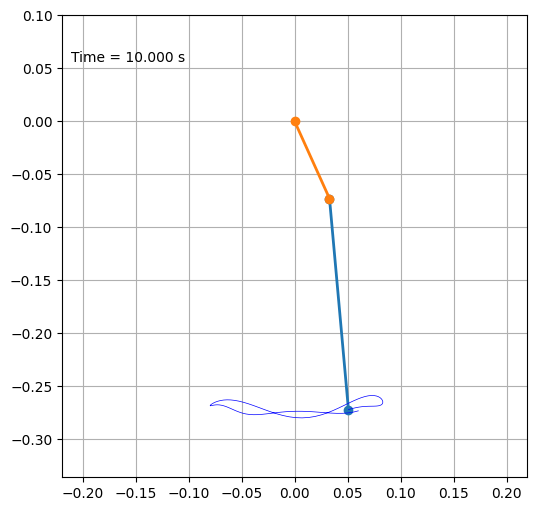

In [5]:
import matplotlib.pyplot as plt
from collections import deque

max_y = max(abs(F['data.p2.y']))*1.2
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-max_y, max_y), ylim=(-max_y, 0.1))
ax.set_aspect('equal', 'datalim')
ax.grid()

# length of the history trace
trace_len = 100
line1, = ax.plot([], [], 'o-', lw=2)
line2, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], 'b-', lw=0.5, ms=1)
time_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
trace_x, trace_y = deque(maxlen=trace_len), deque(maxlen=trace_len)

plt.close()
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    trace.set_data([], [])
    time_text.set_text('')
    trace_x.clear()
    trace_y.clear()
    return line1, line2, trace, time_text

def animate(i):
    trace_x.appendleft(F['data.p2.x'].iloc[i])
    trace_y.appendleft(F['data.p2.y'].iloc[i])

    line1.set_data([[F['data.p1.x'].iloc[i],F['data.p2.x'].iloc[i]],[F['data.p1.y'].iloc[i], F['data.p2.y'].iloc[i]]])
    line2.set_data([[0,F['data.p1.x'].iloc[i]],[0, F['data.p1.y'].iloc[i]]])
    trace.set_data(trace_x, trace_y)

    time_text.set_text('Time = %.3f s' % F['data.t'].iloc[i])
    return line1, line2, trace, time_text

for i in range(len(F)):
    animate(i)

    display(fig, clear=True)